In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("DATA/train.csv")

In [4]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


## EXPLORATORY ANALYSIS

In [5]:
df.columns

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate'], dtype='object')

In [6]:
len(df)

404290

In [7]:
df['qid1'].max()

537932

In [8]:
df['qid1'].min()

1

In [9]:
df['qid2'].max()

537933

In [10]:
df['qid2'].min()

2

In [11]:
len(df['qid1'].value_counts())

290654

In [12]:
df_group = df.groupby("is_duplicate")['id'].count()

In [13]:
df_group

is_duplicate
0    255027
1    149263
Name: id, dtype: int64

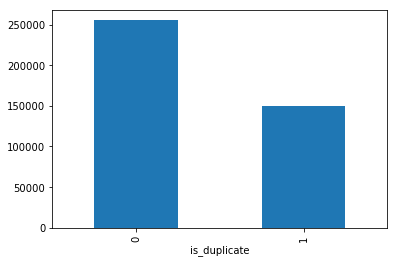

In [14]:
df_group.plot(kind='bar')

# BAG OF WORDS SOLUTIONS

In [15]:
from csv import reader
IN_FILE = "DATA/test.csv"
W_T = 3
f = open('out.csv', 'w')
f.write('test_id,is_duplicate\n')

with open(IN_FILE, "r", encoding='utf8') as test:
    next(test)
    for row in reader(test):
        is_dup = 0
        if (len(row) == 3):
            if len(set(row[1].split()).intersection(set(row[2].split()))) > W_T:
                is_dup = 1
            f.write("%s,%d\n"%(row[0], is_dup))
        else:
            print(line)
            print(row)
            break
f.close()

KeyboardInterrupt: 

### STOP WORDS FILTERING

In [ ]:
from nltk.corpus import stopwords
cachedStopWords = stopwords.words("english")
def filter_word(word_list):
    return [word for word in word_list if word not in cachedStopWords]
from csv import reader
IN_FILE = "DATA/test.csv"
W_T = 3
f = open('out1.csv', 'w')
f.write('test_id,is_duplicate\n')

with open(IN_FILE, "r", encoding='utf8') as test:
    next(test)
    for row in reader(test):
        is_dup = 0
        if (len(row) == 3):
            if len(set(filter_word(row[1].split())).intersection(set(filter_word(row[2].split())))) > W_T:
                is_dup = 1
            f.write("%s,%d\n"%(row[0], is_dup))
        else:
            print(line)
            print(row)
            break
f.close()

In [ ]:
# testing on train set
from nltk.corpus import stopwords
cachedStopWords = stopwords.words("english")
def filter_word(word_list):
    return [word for word in word_list if word not in cachedStopWords]
from csv import reader
IN_FILE = "DATA/train.csv"
W_T = 3
f = open('out_t.csv', 'w', encoding='utf8')
f.write('test_id,is_duplicate\n')

with open(IN_FILE, "r", encoding='utf8') as test:
    next(test)
    for row in reader(test):
        is_dup = 0
        if (len(row) > 4):
            #print(row)
            if len(set(filter_word(row[3].split())).intersection(set(filter_word(row[4].split())))) > W_T:
                is_dup = 1
            f.write('"%s","%s","%s","%s","%s","%d"\n'%(row[0], row[1], row[2],row[3],row[4],is_dup))
            #f.write("%s,%s,%s,%s,%s,%d\n"%(row[0], row[1], row[2],row[3].row[4],is_dup))
        else:
            #print(line)
            print(row)
            break
f.close()

## JACCARD SIMILARITY

In [5]:
from nltk.stem.porter import *
stemmer = PorterStemmer()
import string
from nltk.corpus import stopwords
cachedStopWords = stopwords.words("english")  + list(string.punctuation) + ['']
translator = str.maketrans('', '', string.punctuation)
import re
spw = ' |/|-|:|,|"|\'|\(|\)|\.|&|#|\?'

def filter_word(word_list):
    return [word for word in word_list if word not in cachedStopWords]
from csv import reader
IN_FILE = "DATA/test.csv"
W_T = 3
f = open('out6.csv', 'w', encoding='utf8')
f.write('test_id,is_duplicate\n')

with open(IN_FILE, "r", encoding='utf8') as test:
    next(test)
    for row in reader(test):
        is_dup = 0
        if (len(row) == 3):
            #q1 = filter_word(row[1].lower().translate(translator).split())
            #q2 = filter_word(row[2].lower().translate(translator).split())
            #q1 = filter_word(row[1].lower().split())
            #q2 = filter_word(row[2].lower().split())
            word1_list = filter_word(re.split(spw, row[1].lower()))
            word2_list = filter_word(re.split(spw, row[2].lower()))
            #print(word1_list)
            q1 = filter_word([stemmer.stem(word) for word in word1_list])
            q2 = filter_word([stemmer.stem(word) for word in word2_list])
            
            num_common_words = len(set(q1).intersection(set(q2)))
            num_union_words = len(set(q1).union(set(q2)))
            jac = (num_common_words*1.0)/(num_union_words+1)
            if (jac > 0.4):
                is_dup = 1
            f.write("%s,%d\n"%(row[0], is_dup))
            #f.write('"%s","%s","%s","%s","%s","%d"\n'%(row[0], row[1], row[2],row[3],row[4],is_dup))
        else:
            print(line)
            print(row)
            break
f.close()

In [259]:
from nltk.corpus import stopwords
cachedStopWords = stopwords.words("english")  + list(punctuation)
translator = str.maketrans('', '', string.punctuation)
def filter_word(word_list):
    return [word for word in word_list if word not in cachedStopWords]
from csv import reader
IN_FILE = "DATA/train.csv"
W_T = 3
f = open('out_t2.csv', 'w', encoding='utf8')
f.write('test_id,is_duplicate\n')

with open(IN_FILE, "r", encoding='utf8') as test:
    next(test)
    for row in reader(test):
        is_dup = 0
        if (len(row) > 4):
            #num_common_words = len(set(filter_word(row[3].split())).intersection(set(filter_word(row[4].split()))))
            #num_union_words = len(set(filter_word(row[3].split())).union(set(filter_word(row[4].split()))))
            q1 = filter_word(stemmer.stem(row[3].lower().translate(translator).split()))
            q2 = filter_word(stemmer.stem(row[4].lower().translate(translator).split())
            num_common_words = len(set(q1).intersection(set(q2)))
            num_union_words = len(set(q1).union(set(q2)))
            jac = (num_common_words*1.0)/(num_union_words+1)
            if (jac > 0.4):
                is_dup = 1
            #print(q1)
            #f.write("%s,%d\n"%(row[0], is_dup))
            f.write('"%s","%s","%s","%s","%s","%d"\n'%(row[0], row[1], row[2],row[3],row[4],is_dup))
        else:
            print(line)
            print(row)
            break
        
        #break
f.close()

In [310]:
from nltk.stem.porter import *
stemmer = PorterStemmer()
plurals = ['caresses', 'flies', 'dies', 'mules', 'denied']
singles = [stemmer.stem(plural) for plural in plurals]
print(singles)

['caress', 'fli', 'die', 'mule', 'deni']


## IDF

In [249]:
import string
translator = str.maketrans('', '', string.punctuation)
cachedStopWords = stopwords.words("english")  + list(punctuation)
def filter_word(word_list):
    return [word for word in word_list if word not in cachedStopWords]
from csv import reader
IN_FILE = "DATA/test.csv"

from collections import defaultdict
import math
word_idf = defaultdict(lambda: 0)
num_lines = 0
with open(IN_FILE, "r", encoding='utf8') as test:
    next(test)
    for row in reader(test):
        if (len(row) == 3):
            q1 = filter_word(row[1].lower().translate(translator).split())
            q2 = filter_word(row[2].lower().translate(translator).split())
            
            for q in q1:
                word_idf[q] += 1
            for q in q2:
                word_idf[q] += 1
            num_lines += 1
        else:
            print(line)
            print(row)
            break

In [250]:
len(word_idf)

118651

In [251]:
word_idf['train']

5643

In [252]:
word_idf['temple']

1204

In [253]:
word_idf['hyderabad']

7898

In [255]:
len(([key for key in word_idf.keys() if word_idf[key] < 10]))

57689

In [238]:
print(list(punctuation))

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']


In [256]:
[key for key in word_idf.keys() if word_idf[key] < 10][:200]

['axa',
 'lnkd',
 'iiftxatnmatsnap',
 'cydonia',
 'directlyindirectly',
 'carrierdelivery',
 'chopard',
 'cartier',
 'playstyle',
 'fairimpartialblind',
 '➰',
 '180amper',
 'chaged',
 'alkhalid',
 'indiaor',
 'minored',
 'boobsbreasts',
 'gazillion',
 'handsmale',
 'makings',
 'burara',
 'crewrowing',
 'dubra',
 'chugged',
 'withings',
 'webfocus',
 'byepass',
 'stringbuffer',
 'amaq',
 'auditya',
 'venkatesh',
 'tnmc',
 'classses',
 'glomar',
 'cmephod',
 'taxability',
 'kalindarobyn',
 '4monthold',
 'vonrio’s',
 'restraing',
 'anythingwant',
 'needlessly',
 'technologyframework',
 'bhorror',
 '1970present',
 '12809',
 'studypoolcom',
 'fatas',
 'scarythrillerghost',
 'storiesincidents',
 'manudhane',
 'ptedu',
 'whiteamerican',
 'hyperworks',
 'winpcap',
 '413',
 'naushad',
 'aicet',
 'aprovedcan',
 'mtechcan',
 'jobsexpecting',
 'micrometer',
 'brach',
 'paramore',
 'madre',
 'smg900v',
 'grasseating',
 'corkscrew',
 'caucasianmixed',
 '5875',
 'tenens',
 'paychecks',
 'facist',
 's

In [304]:
s = "max/min none-car yes:no she,he,h(ijk)\"k'lkdfhd.dfdsf&hello#yes?"
#s.split(' ' + string.punctuation)

import re
spw = ' |/|-|:|,|"|\'|\(|\)|\.|&|#|\?'
re.split(spw, s)

['max',
 'min',
 'none',
 'car',
 'yes',
 'no',
 'she',
 'he',
 'h',
 'ijk',
 '',
 'k',
 'lkdfhd',
 'dfdsf',
 'hello',
 'yes',
 '']

In [277]:
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [171]:
print(num_lines)

2345796


In [144]:
for word in word_idf:
    word_idf[word] = np.log(num_lines/(word_idf[word]+1))

In [158]:
print(([key for key in word_idf.keys() if word_idf[key] < 5 ]))

['hair', 'much', 'would', 'cost', 'best', 'way', 'money', 'start', 'two', 'one', 'black', 'books', 'time?', 'years', 'old', 'sex', 'year', 'app', 'social', 'made', 'people', '5', 'getting', '2', '3', 'learn', 'work?', 'get', 'buy', "what's", 'difference', 'could', 'still', 'like', 'trump', 'got', 'possible', 'person', 'want', 'eat', 'do?', 'win', 'why?', 'first', 'computer', 'language', 'programming', 'good', 'high', 'study', 'college', 'give', 'thing', 'you?', 'used', 'word', 'improve', 'many', 'us', '&', 'know', 'new', 'change', 'make', 'examples', 'question', "i'm", 'time', 'travel', 'job', 'web', 'ever', 'life?', 'write', 'business', 'ways', 'lose', 'weight?', 'movie', 'become', 'quora', 'quora?', 'better', 'watch', 'see', 'facebook', 'data', 'ask', 'find', 'questions', 'love', 'number', 'university', 'india?', 'feel', '?', 'without', 'life', 'say', "don't", 'mean?', 'really', 'use', 'going', 'bad', 'bank', 'back', 'happen', 'indian', 'top', 'mean', 'women', 'me?', 'student', 'go',

In [166]:
len(([key for key in word_idf.keys() if word_idf[key] < 5 ]))

192

In [149]:
word_idf['india']

3.6204090719964905

In [150]:
word_idf['take']

3.9290032865682631

In [157]:
avg(word_idf.values())

NameError: name 'avg' is not defined

In [53]:
from nltk.text import TextCollection
from nltk.book import text1, text2, text3, text4, text5, text6

mytexts = TextCollection([text1, text2, text3, text4, text5, text6])

# Print the IDF of a word
print(mytexts.idf("India"))
print(mytexts.idf("America"))
print(mytexts.idf("text"))

1.791759469228055
1.0986122886681098
1.0986122886681098


In [63]:
from nltk.corpus import reuters
 
from string import punctuation
from nltk.corpus import stopwords
from nltk import word_tokenize
 
stop_words = stopwords.words('english') + list(punctuation)
 
def tokenize(text):
    words = word_tokenize(text)
    words = [w.lower() for w in words]
    return [w for w in words if w not in stop_words and not w.isdigit()]

In [65]:
vocabulary = set()
for file_id in reuters.fileids():
    words = tokenize(reuters.raw(file_id))
    vocabulary.update(words)
 
vocabulary = list(vocabulary)
word_index = {w: idx for idx, w in enumerate(vocabulary)}
 
VOCABULARY_SIZE = len(vocabulary)
DOCUMENTS_COUNT = len(reuters.fileids())
 
print(VOCABULARY_SIZE, DOCUMENTS_COUNT)      # 10788, 51581

51570 10788


In [131]:
from collections import defaultdict
import math
word_idf = defaultdict(lambda: 0)
for file_id in reuters.fileids():
    words = set(tokenize(reuters.raw(file_id)))
    for word in words:
        word_idf[word] += 1
 
for word in vocabulary:
    word_idf[word] = math.log(DOCUMENTS_COUNT / float(1 + word_idf[word]))
 
print(word_idf['deliberations'])     # 7.49443021503
print(word_idf['committee'])     # 3.61286641709

7.494430215031565
3.612866417088128


In [132]:
print(word_idf['india'])
print(word_idf['america'])
print(word_idf['singapore'])
print(word_idf['hospital'])

5.096534942233195
4.076703531418199
5.159055299214529
6.647132354644362


In [134]:
print(word_idf['tomorrow'])
print(word_idf['bird'])
print(word_idf['congress'])
print(word_idf['said'])
print(word_idf['received'])
print(word_idf['listened'])
print(word_idf['heard'])
print(([key for key in word_idf.keys() if word_idf[key] < 2 ]))

4.060443010546419
8.18757739559151
4.168195871842865
0.4637201119906511
3.6730615778715503
7.67675177182552
6.150695468330471
['also', 'said', 'new', 'billion', 'last', 'dlrs', 'share', 'pct', '``', "''", 'mln', 'year', 'u.s.', 'lt', "'s", 'would', 'one', 'two', 'corp', 'net', 'company', 'vs', 'shr', 'note', 'inc', 'qtr', 'cts']


In [127]:
word_idf['india']

5.096534942233195

In [58]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

## COUNT VECTORIZER

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
import re
REGEX = re.compile(r",\s*")
def tokenize(text):
    return [tok.strip().lower() for tok in REGEX.split(text)]

In [ ]:
type(df['question1'])

In [ ]:
df['question1'].iloc[9]

In [ ]:
vec = CountVectorizer(tokenizer=tokenize)

In [ ]:
data = vec.fit_transform(df['question1']).toarray()

In [ ]:
cv

In [ ]:
len(cv.vocabulary_)

In [ ]:
len(cv.get_feature_names())

In [ ]:
term_freq = cv.fit_transform(df['question1'])

In [ ]:
term_freq

In [ ]:
term_freq[3][0]

In [ ]:
tfidf = TfidfTransformer()

In [ ]:
tfidf_freq = tfidf.fit_transform(term_freq)

In [ ]:
tfidf_freq

In [ ]:
tfidf_freq.get_params()

In [ ]:
t1 = (tfidf_freq.tocoo()).todense()

In [ ]:
tfidf_freq.todense()